Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
2 --building_windows_non_float_processed
3 --vehicle_windows_float_processed
4 --vehicle_windows_non_float_processed (none in this database)
5 --containers
6 --tableware
7 --headlamps


In [6]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
glass_df=pd.read_csv('/content/drive/MyDrive/glass.csv')

In [9]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [10]:
array=glass_df.values

In [11]:
x=array[:,0:9]
y=array[:,9:]

In [12]:
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [21]:
import re
kfold=KFold(n_splits=25)
classifier=KNeighborsClassifier(n_neighbors=5)
result=cross_val_score(classifier,x,y.ravel(),cv=kfold)
result.mean()*100.0

56.666666666666664

when number of neighbor is 5 , Accuracy is 56%

#Grid Search for algorithm Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
array=glass_df.values
x=array[:,0:9]
y=array[:,9:]

In [26]:
import numpy as np
n_neighbor=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbor)

In [27]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [28]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


optimum number of neighbor is 1.
**Accuracy 64%**

#Visualizing the CV result

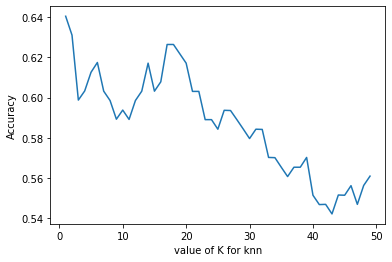

In [35]:
import matplotlib.pyplot as plt
k_range=range(1,50)
k_score=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(knn,x,y.ravel(),cv=5)
  k_score.append(score.mean())
plt.plot(k_range,k_score)
plt.xlabel('value of K for knn')
plt.ylabel("Accuracy")
plt.show()  